<h1 align='center'>Build and evaluate a regression model</h1>

In this notebook we build regression models using linear regression and knn algorithms and choose the best one.

## Import the libraries we need


In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn functionality
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics
from sklearn.metrics import mean_absolute_error

## Define the task

> Make predictions about a country's life expectancy in years from a set of metrics for the country.

The only difference between this task and the one we defined for our classification task is that we are predicting the life expectancy in years, rather than as L, M, and H bands. Remember that regression is about predicting a continuous numeric feature and classification is about predicting a category.

# Acquire clean data
## Load the data
We will load and quickly clean our data.

In [3]:
dataset = pd.read_csv("world_data.csv")
dataset.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000


In [4]:
# Remove sparsely populated features
dataset = dataset.drop(["murder","urbanpopulation","unemployment"], axis=1)

# Impute all features with mean
means = dataset.mean().to_dict()
for m in means:
    dataset[m] = dataset[m].fillna(value=means[m])

# set the country column as index
dataset.set_index('country', inplace = True)

C:\Users\hayth\AppData\Local\Temp\ipykernel_21124\1699496239.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = dataset.mean().to_dict()


<div class="alert alert-warning">
Don't forget that this is just one (fairly simplistic) approach to cleaning the data. You will want to come back later, once you build the initial model, to see how you can improve your cleanup strategy.
</div>

## Understand the data

Let's introduce some other interesting visualizations for inspecting and visualizing this data.

We'll use a nice plot style

In [5]:
plt.style.use('bmh')

We can understand the distribution of each individual feature using histograms:

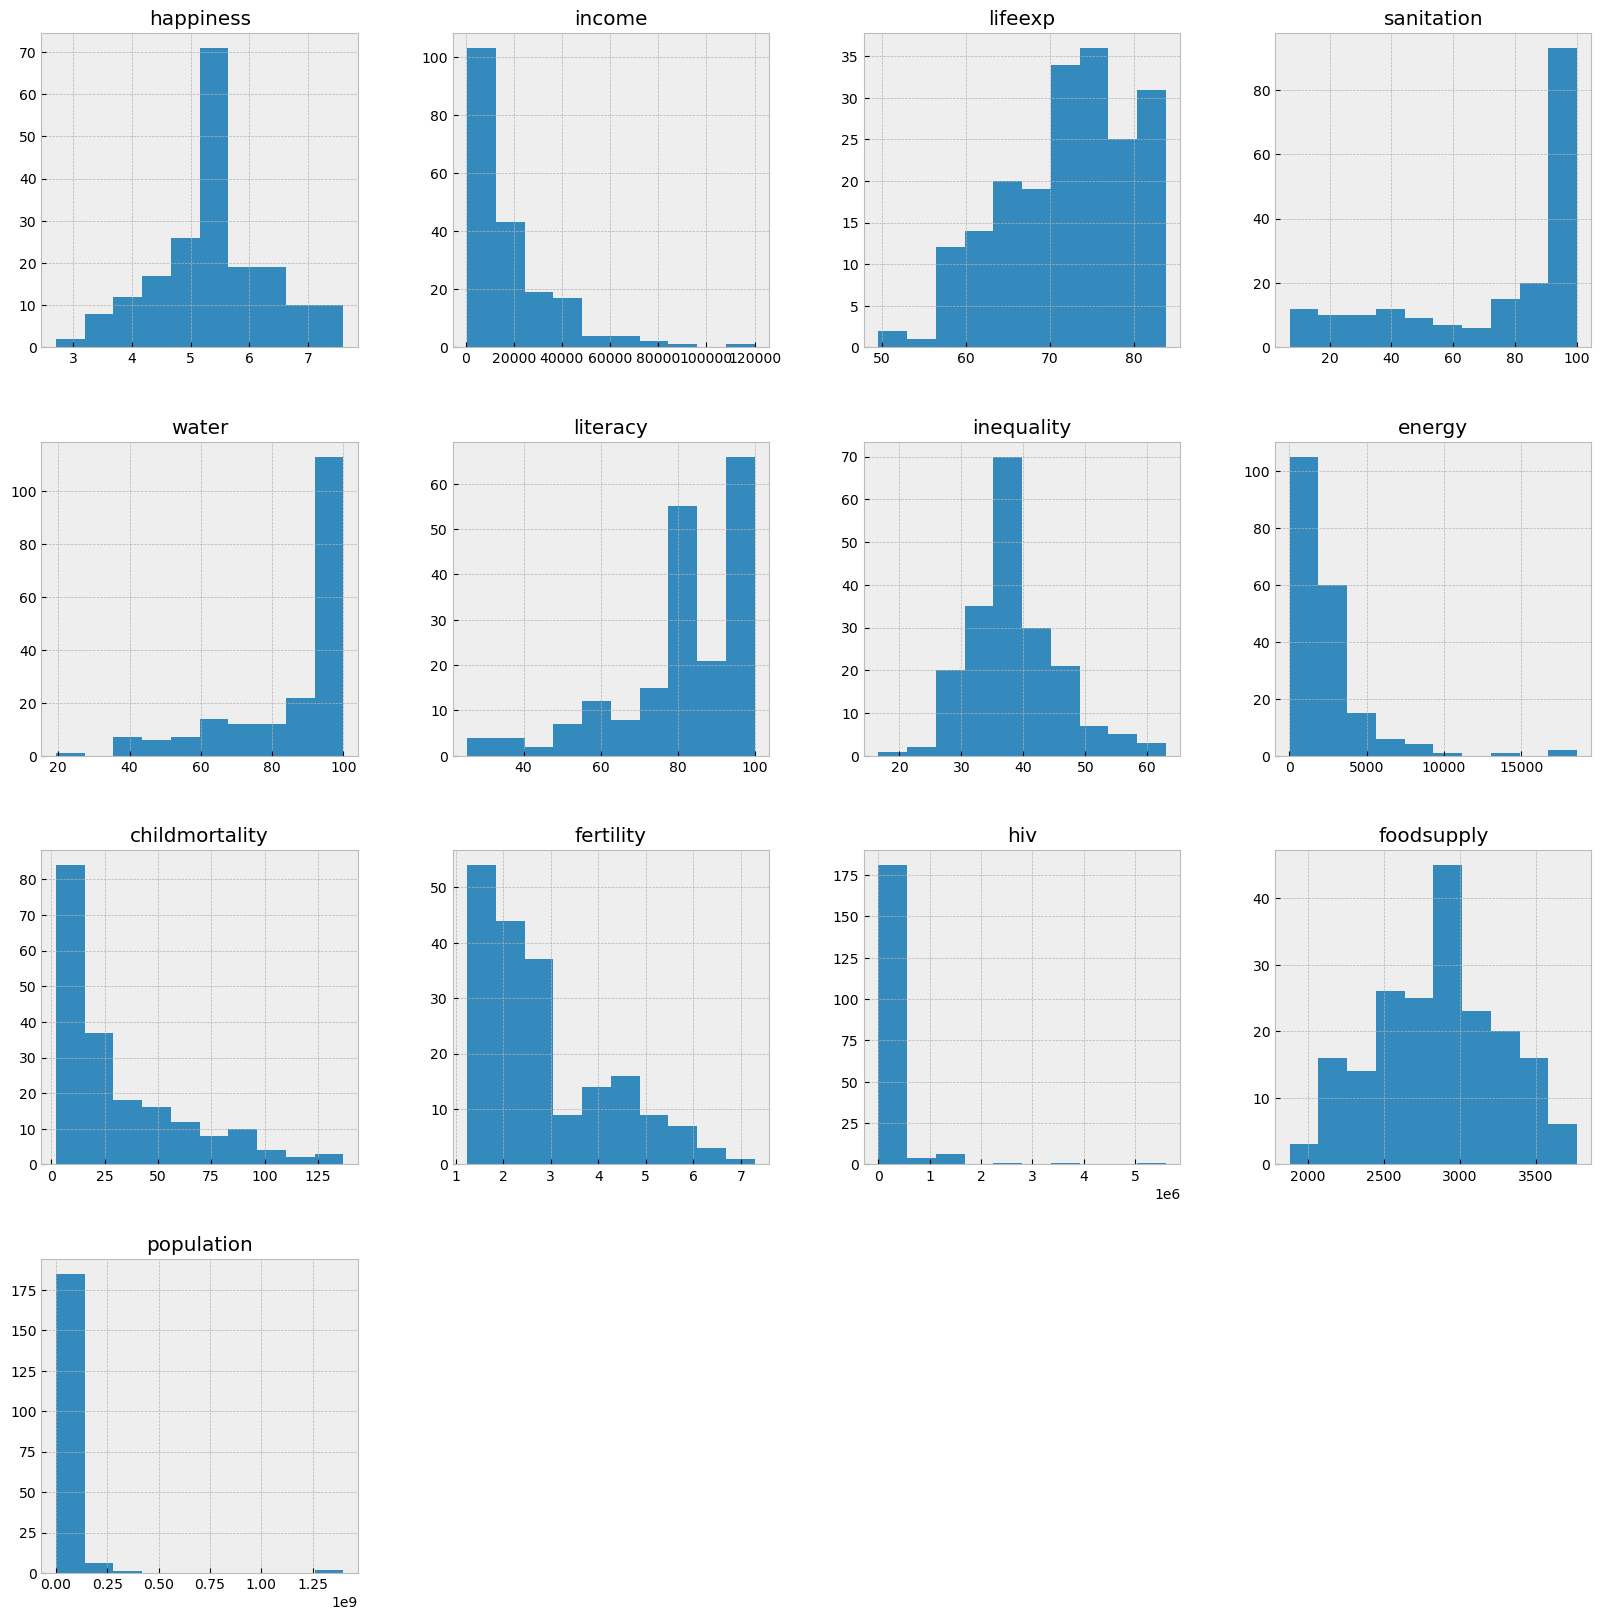

In [6]:
# Histogram plot
dataset.hist(figsize=(20,20))
plt.show()

Another interesting plot is the scatter matrix.  This shows the correlation between pairs of features:

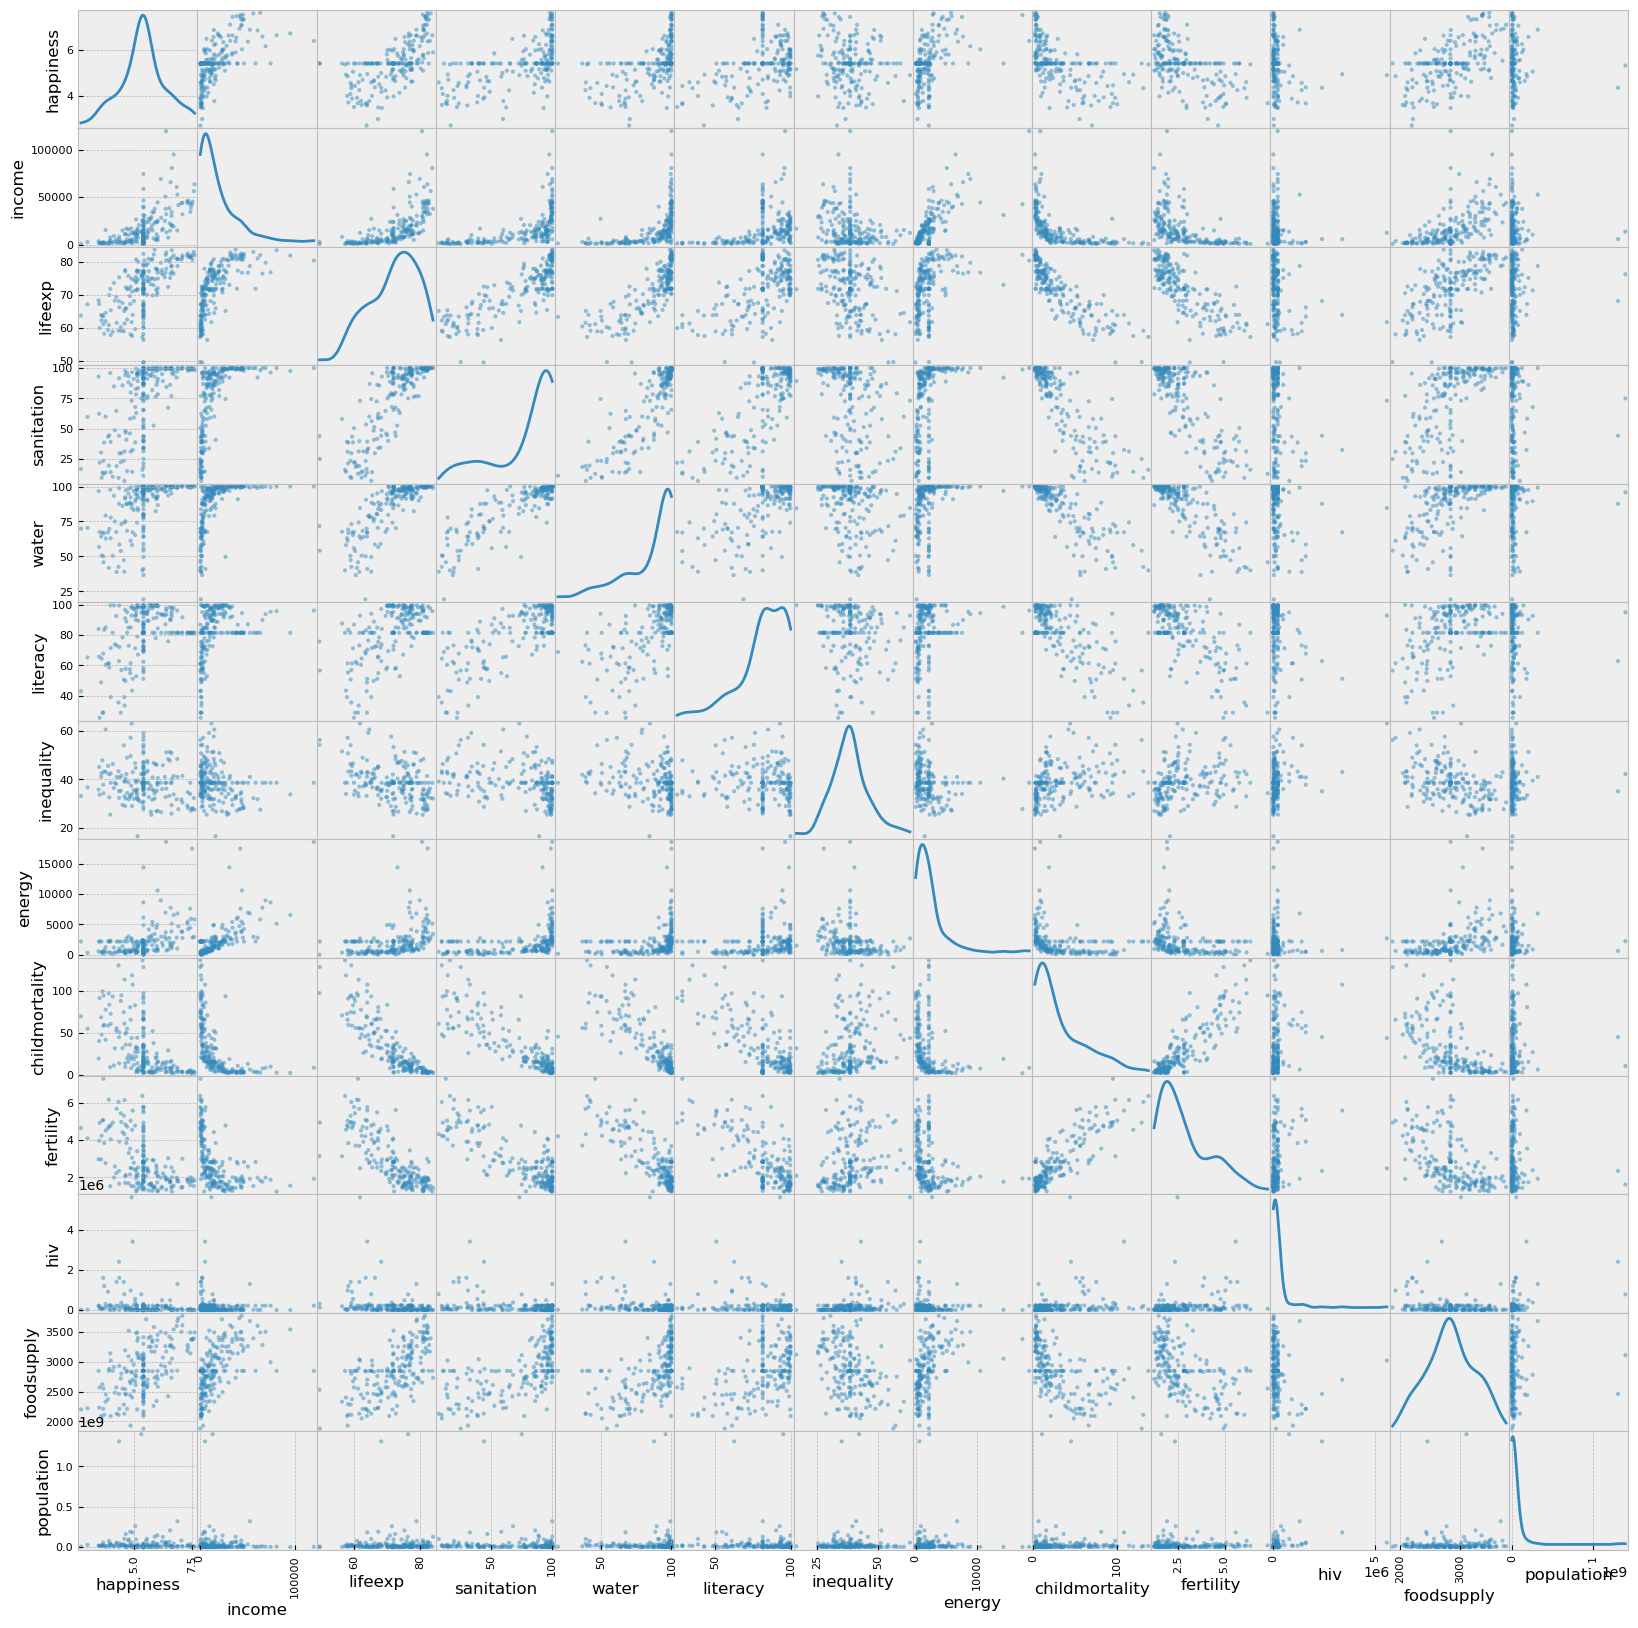

In [7]:
pd.plotting.scatter_matrix(dataset,figsize=(20, 20),  diagonal='kde')
plt.show()

You can look at the correlation between *lifeexp* and *sanitation* and see a positive correlation, and *lifeexp* and *fertility* and see a negative correlation.

This gives you a better feel for the data, and in particular, how the target feature, lifeexp, relates to the other features. After all, this is the relationship the machine learning algorithms will use to make their predictions!

## Prepare data

### Select features

We will predict lifeexp, and this feature becomes our y.  We will use all the other features as our inputs, X:

In [8]:
dataset.columns

Index(['happiness', 'income', 'lifeexp', 'sanitation', 'water', 'literacy',
       'inequality', 'energy', 'childmortality', 'fertility', 'hiv',
       'foodsupply', 'population'],
      dtype='object')

In [9]:
y = dataset["lifeexp"]
X = dataset.drop(columns = ["lifeexp"])

### Scale features

As discussed in the classification exercise performed with this data, scale the data before building the model to ensure the features are presented without a scale bias to the selected algorithms.

In this case, let's use the `MinMaxScaler()`, which scales the data, so every feature sits in the range 0 to 1.

In [10]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, index=X.index, columns=X.columns)

## Build models

For this task, we'll build two models using two algorithms for regression: **Linear Regression** and **K-Nearest Neighbors**.

### Split into test and training sets

We will build all three models using the same training set and evaluate them with the same test set.  So, let's split into test and training sets now:

In [11]:
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

### Create multiple models, fit them and check them

In [12]:
KNeighborsRegressor().get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [13]:
# Create and check a number of models
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=5, metric='euclidean')]

for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__, mean_absolute_error(Y_train, predictions))
    print(type(model).__name__,"R squared", metrics.r2_score(Y_train,predictions))

LinearRegression 2.2920035925091757
LinearRegression R squared 0.8524068429515373
KNeighborsRegressor 2.1955055341375447
KNeighborsRegressor R squared 0.8563848899032322


You can see the **mean absolute error (MAE)** for each model based on the training data. The MAE is the mean of the sum of the absolute values of all prediction errors. In other words, for each prediction, subtract the predicted value from the actual value, take the absolute value, sum up all these, and divide by the number of examined sample points:

$$
MAE= \frac{\sum_{} |y_{real}−y_{pred}|}{N}
$$

Where y is the actual value, ŷ is the predicted value, and N is the number of sample points.

In this case, the values are in the units of the predicted feature, which is life expectancy in years. So linear regression has achieved a mean absolute error of 2.29 years. As this is on the training data, we now need to use the test data to do a proper evaluation.

## Evaluate models

Now we evaluate the models by testing with the test set:

In [14]:
# Evaluate the models
for model in models:
    predictions = model.predict(X_test)
    print(type(model).__name__,"MSE\t" ,  mean_absolute_error(Y_test, predictions))
    print(type(model).__name__,"R squared\t", metrics.r2_score(Y_test,predictions))

LinearRegression MSE	 2.4463956508110276
LinearRegression R squared	 0.8087506800509187
KNeighborsRegressor MSE	 2.5532340600575916
KNeighborsRegressor R squared	 0.7799092817157225


Which is the best model?  The one with the lowest mean absolute error, which is linear regression.  So we will choose this model:

In [15]:
# Choose best model
model = models[0]

To get a better feel for how well the model has worked, we can add the predictions and actuals back to the test data, so we can see the quality of the predictions on a country-by-country basis:

In [16]:
# See predictions made
predictions = model.predict(X_test)
df = X_test.copy()
df['Prediction'] = predictions
df['Actual'] = Y_test
df["Error"] = Y_test - predictions
df

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population,Prediction,Actual,Error
country,,,,,,,,,,,,,,,
Ghana,0.262009,0.027702,0.077701,0.724907,0.618474,0.556034,0.017505,0.436202,0.462810,0.041061,0.603175,1.970658e-02,63.053160,65.40000,2.346840
Nauru,0.549625,0.097816,0.629789,1.000000,0.753331,0.473693,0.116950,0.247774,0.263789,0.038917,0.511086,2.142874e-07,70.676398,71.93369,1.257292
Kiribati,0.549625,0.010446,0.352131,0.558860,0.753331,0.439655,0.005617,0.398368,0.404959,0.038917,0.613757,7.214342e-05,65.940097,61.60000,-4.340097
Egypt,0.420443,0.079387,0.926819,0.980173,0.638554,0.327586,0.043324,0.159496,0.342149,0.001686,0.867725,6.699267e-02,75.009327,71.90000,-3.109327
Vietnam,0.484455,0.042278,0.765390,0.890954,0.911647,0.392241,0.034718,0.146884,0.119008,0.044633,0.460317,6.684981e-02,72.167158,74.30000,2.132842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tonga,0.549625,0.038257,0.930047,0.998761,0.986613,0.450431,0.029984,0.108309,0.403306,0.038917,0.511086,6.785768e-05,73.113437,70.30000,-2.813437
Burkina Faso,0.350346,0.007765,0.165949,0.428748,0.045515,0.403017,0.116950,0.640208,0.694215,0.021418,0.444444,1.292082e-02,61.812405,60.30000,-1.512405
Grenada,0.549625,0.101167,0.766466,0.945477,0.753331,0.473693,0.041549,0.100890,0.147107,0.038917,0.301587,6.857197e-05,73.569757,71.40000,-2.169757


Look at the three columns on the far right of the above table.  These show how close the model is to predicting the actual life expectancy for each country.

## Iterate!

At this point, you will want to go back to previous steps such as cleansing and feature engineering, to attempt to make improvements to the model.

## Interpret model

It's good to look inside the models to understand what was created. Linear regression and KNN use very different ways of building models, and you need to interpret them in different ways.

### Intepret linear regression model
Extract the coefficients using this code:

In [17]:
models[0].coef_

array([  5.00912637,   9.2096769 ,   5.41605897,   2.26122297,
        -4.13876626,  -3.31059309,  -5.53211396, -14.32217202,
        -1.63521978,  -2.01476135,   2.22581396,   3.20586791])

Extract the intercept using this code:

In [18]:
models[0].intercept_

69.60409836404615

The  formula for the linear regression line computed by sklearn from this data is:

$$
LifeExp = 5.01*Happiness + 9.21*Income + 5.42*Sanitation + 2.26*Water - 4.14*Literacy - 3.31*Inequality - 5.53*Energy -14.32*Childmortality - 1.64*Fertility - 2.01*Hiv + 2.23*Foodsupply + 3.21*Population + 69.60
$$

Remember that the inputs to this formula are the scaled inputs, using the MinMaxScaler.

In [19]:
def linearRegressionSummary(model, column_names):
    '''Show a summary of the trained linear regression model'''

    # Plot the coeffients as bars
    fig = plt.figure(figsize=(8,len(column_names)/3))
    fig.suptitle('Linear Regression Coefficients', fontsize=16)
    rects = plt.barh(column_names, model.coef_,color="lightblue")

    # Annotate the bars with the coefficient values
    for rect in rects:
        width = round(rect.get_width(),4)
        plt.gca().annotate('  {}  '.format(width),
                    xy=(0, rect.get_y()),
                    xytext=(0,2),
                    textcoords="offset points",
                    ha='left' if width<0 else 'right', va='bottom')
    plt.show()

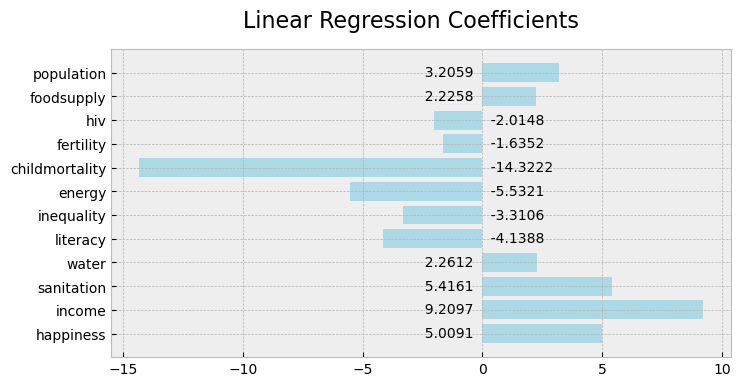

In [20]:
linearRegressionSummary(models[0], X.columns)

How do you interpret this?

* For each unit increase in happiness, there is a 5.01 year increase in lifeexp.

* For each unit increase in income, there is a 9.21 year increase in lifeexp.

* For each unit increase in inequality, there is a 3.31 year decrease in lifeexp.

Be aware of what a "unit" means in this case. Because we scaled the data using the MinMaxScaler, all features are the scaled units. So one unit of income is the difference between the max income \\$120,000, and min income \\$623, which is \\$119,377. If you do the math (119377/9.2097), you can see that this model predicts that each $12,962 increase in average income, increases life expectancy by one year.

<div class="alert alert-info">
If you wanted to apply this model to a new set of data, you need to give the input data the same treatment. So you would need to apply the MinMaxScaler with the same scaling parameters used on the training and test data when building the model.
</div>

In [21]:
KNeighborsRegressor().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In K-Nearest Neighbors (KNN), the ***weights*** hyperparameter determines how the contributions of the k nearest neighbors are weighted when making predictions for new data points. The weights hyperparameter can take on two possible values:

**weights=*'uniform'*:** In this case, all neighbors are given equal weight when making predictions. This means that the prediction for a new data point is simply the average of the target values of its k nearest neighbors.

**weights=*'distance'*:** In this case, the contribution of each neighbor to the prediction is weighted by the inverse of its distance from the new data point. This means that closer neighbors have a greater influence on the prediction than more distant neighbors.

So, when weights='distance', the prediction for a new data point is the weighted average of the target values of its k nearest neighbors, where the weights are determined by the inverse of the distances between the new data point and its neighbors.

### Interpret knn model

Interpreting KNN models is a little more tricky. The problem isn't reduced to a simple formula. The algorithm performs a calculation for each individual.

We can get the distances for the k-nearest neighbors for each data point:

In [22]:
# Distances for k nearest neighbours to each point
models[1].kneighbors(X)

(array([[0.        , 0.38911668, 0.3929857 , 0.4201251 , 0.51618381],
        [0.        , 0.20505552, 0.20891422, 0.23226123, 0.26827204],
        [0.        , 0.12274953, 0.1953064 , 0.22064946, 0.22207317],
        [0.        , 0.16349608, 0.20891422, 0.22826679, 0.28847733],
        [0.13327753, 0.15176936, 0.16216559, 0.16956607, 0.18772587],
        [0.10256832, 0.15520456, 0.24629633, 0.24943538, 0.25508778],
        [0.        , 0.3593436 , 0.38793799, 0.38953126, 0.39317685],
        [0.        , 0.31469369, 0.32420127, 0.35698837, 0.41441586],
        [0.        , 0.1962574 , 0.34952635, 0.44393928, 0.51551159],
        [0.        , 0.12677335, 0.18037416, 0.18620954, 0.22384403],
        [0.        , 0.1768139 , 0.24628597, 0.25110484, 0.26795007],
        [0.50647823, 0.51036495, 0.51934624, 0.53394104, 0.5422487 ],
        [0.        , 0.28806232, 0.34952635, 0.46122169, 0.46576997],
        [0.        , 0.31134313, 0.31241819, 0.3828958 , 0.39244964],
        [0.15281102,

As you can see, there are five values for each data point because that is the default value of k for the KNeighborsRegressor.

We can also get the actual data points that are the nearest neighbors:

In [23]:
# Actual nearest neighbour points
g = models[1].kneighbors_graph(X).toarray()
g[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Inspecting the neighbors of the first data point:

In [24]:
# First data point's nearest neighbours
cond = [True if x == 1 else False for x in g[5]]

for country, condition in zip(X.index, cond):
    if condition :
        print(country)

Benin
Iran
Ireland
Morocco
Nicaragua


Each 1 represents another data point that is considered a neighbor.  

## Recap
* **Build multiple models** from the same dataset, and see which one performs the best.

* Measure the performance of a regression model using **mean absolute error (MAE)** and **R_squared**.

* **Iterate** to improve model performance.

* Inspect the **coefficients** for a linear regression model, and use them to understand the relevance of each input feature to the predictions of the model.

* Inspect the information about the neighbors in a KNN model, but these are more difficult to interpret.